Epoch 1/30
73/73 - 3s - loss: 0.1555 - mae: 0.3209
Epoch 2/30
73/73 - 0s - loss: 0.0360 - mae: 0.1573
Epoch 3/30
73/73 - 0s - loss: 0.0338 - mae: 0.1494
Epoch 4/30
73/73 - 0s - loss: 0.0308 - mae: 0.1401
Epoch 5/30
73/73 - 0s - loss: 0.0291 - mae: 0.1350
Epoch 6/30
73/73 - 0s - loss: 0.0283 - mae: 0.1241
Epoch 7/30
73/73 - 0s - loss: 0.0276 - mae: 0.1284
Epoch 8/30
73/73 - 0s - loss: 0.0260 - mae: 0.1175
Epoch 9/30
73/73 - 0s - loss: 0.0255 - mae: 0.1179
Epoch 10/30
73/73 - 0s - loss: 0.0264 - mae: 0.1175
Epoch 11/30
73/73 - 0s - loss: 0.0268 - mae: 0.1175
Epoch 12/30
73/73 - 0s - loss: 0.0266 - mae: 0.1170
Epoch 13/30
73/73 - 0s - loss: 0.0261 - mae: 0.1161
Epoch 14/30
73/73 - 0s - loss: 0.0265 - mae: 0.1188
Epoch 15/30
73/73 - 0s - loss: 0.0254 - mae: 0.1143
Epoch 16/30
73/73 - 0s - loss: 0.0256 - mae: 0.1101
Epoch 17/30
73/73 - 0s - loss: 0.0252 - mae: 0.1137
Epoch 18/30
73/73 - 0s - loss: 0.0256 - mae: 0.1125
Epoch 19/30
73/73 - 0s - loss: 0.0264 - mae: 0.1149
Epoch 20/30
73/73 - 0

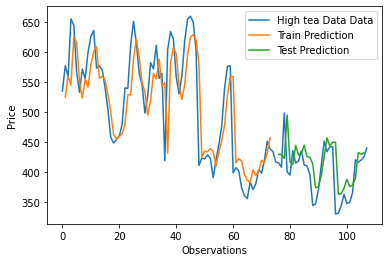

In [7]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

def create_dataset(dataset, lookback=1):
    dataX = []
    dataY = []
    for i in range(len(dataset) - lookback - 1):
        a = dataset[i: (i+lookback), 0]
        dataX.append(a)
        dataY.append(dataset[i+lookback,0])
    return np.array(dataX), np.array(dataY)



np.random.seed(7)

np.random.seed(7)

df = pd.read_csv(r"C:\Users\user\Desktop\Research\highTea2.csv", usecols=[1])
df = df.dropna()
dataset = df.values
dataset = dataset.astype("float32")

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

train_dataset = dataset[:int(len(dataset)*0.7), :]
test_dataset = dataset[int(len(dataset)*0.7):, :]

lookback = 1
trainX, trainY = create_dataset(train_dataset, lookback)
testX, testY = create_dataset(test_dataset, lookback)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model = Sequential()
# Check LSTM
model.add(LSTM(200, input_shape=(1, lookback)))
#return_sequences=True, model.add(LSTM(4))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.fit(trainX, trainY, epochs=30, batch_size=1, verbose=2)

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(trainPredict)+lookback, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(lookback*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="High tea Data Data")
plt.plot(trainPredictPlot, label="Train Prediction")
plt.plot(testPredictPlot, label="Test Prediction")
plt.xlabel("Observations")
plt.ylabel("Price")
plt.legend()
plt.show()

In [8]:
from keras.models import load_model
model.save('my_model.h5')

In [9]:
model = load_model('my_model.h5')

In [10]:
from sklearn.metrics import r2_score
trainScore = math.sqrt(r2_score(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f R2' % (trainScore))
testScore = math.sqrt(r2_score(testY[0], testPredict[:,0]))
print('Test Score: %.2f R2' % (testScore))

Train Score: 0.82 R2
Test Score: 0.27 R2
